In [7]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('OceanWaste').getOrCreate()

df = spark.read.csv("Dataset722.csv", header=True)
# df.show()


df_latitude = df.select("Latitude")
df_longitude = df.select("Longitude")

df.select("Latitude").show()
df.show()

+--------+
|Latitude|
+--------+
|   19.94|
|   20.22|
|   20.45|
|   21.13|
|   21.47|
|   21.74|
|   22.15|
|   22.84|
|   24.36|
|   24.36|
|   24.77|
|   25.38|
|   25.56|
|   26.09|
|   29.25|
|   29.75|
|   30.55|
|   31.18|
|   31.54|
|   31.96|
+--------+
only showing top 20 rows

+---+--------+---------+---------+---------+---------+----+-----+------+--------+----+----+
| ID|Latitude|Longitude|      CD1|      CD2|      CD3| CD4|  WD1|   WD2|     WD3| WD4|  BS|
+---+--------+---------+---------+---------+---------+----+-----+------+--------+----+----+
|  1|   19.94|   -64.56| 58102.96| 21259.89|  2226.17|null| 4.45| 26.83|    4.23|null|2.50|
|  2|   20.22|   -64.38|  6639.79|  4031.30|  1067.11|null| 1.04| 28.69|   40.79|null|2.00|
|  3|   20.45|   -64.20| 15246.71| 12147.79|   991.66|null| 2.57| 42.62| 3503.27|null|2.00|
|  4|   21.13|   -63.83|  5347.35|  6851.29|  1420.39|null| 1.15| 12.86|    4.26|null|2.00|
|  5|   21.47|   -63.59|  4090.58|  5317.76|   409.06|null| 0.48| 

In [59]:
# We can use the describe method get some general statistics on our data too. Remember to show the DataFrame!
df.describe().show()


# use schema to view the data type
df.printSchema()

+-------+-----------------+------------------+-------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+
|summary|               ID|          Latitude|          Longitude|              CD1|               CD2|               CD3|               CD4|              WD1|               WD2|              WD3|               WD4|                BS|
+-------+-----------------+------------------+-------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+
|  count|             1571|              1571|               1571|              679|               679|               807|              1089|              441|               441|              569|               887|              1213|
|   mean|            786.0|13.408777848504117|-10.2098854232

In [9]:
from pyspark.sql.types import (StructField, IntegerType, StructType, DoubleType)

# Then create a variable with the correct structure.
data_schema = [StructField('ID', IntegerType(), True),
               StructField('Latitude', DoubleType(), True),
               StructField('Longitude', DoubleType(), True),
               StructField('CD1', DoubleType(), True),
               StructField('CD2', DoubleType(), True),
               StructField('CD3', DoubleType(), True),
               StructField('CD4', DoubleType(), True),
               StructField('WD1', DoubleType(), True),
               StructField('WD2', DoubleType(), True),
               StructField('WD3', DoubleType(), True),
               StructField('WD4', DoubleType(), True),
               StructField('BS', DoubleType(), True)]

final_struct = StructType(fields=data_schema)
# %%
# And now we can read in the data using that schema. If we print the schema, we can see that age is now an integer.
df = spark.read.csv("Dataset722.csv", schema=final_struct,header=True)
df.printSchema()
df.show()

root
 |-- ID: integer (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- CD1: double (nullable = true)
 |-- CD2: double (nullable = true)
 |-- CD3: double (nullable = true)
 |-- CD4: double (nullable = true)
 |-- WD1: double (nullable = true)
 |-- WD2: double (nullable = true)
 |-- WD3: double (nullable = true)
 |-- WD4: double (nullable = true)
 |-- BS: double (nullable = true)

+---+--------+---------+---------+---------+---------+----+-----+------+--------+----+---+
| ID|Latitude|Longitude|      CD1|      CD2|      CD3| CD4|  WD1|   WD2|     WD3| WD4| BS|
+---+--------+---------+---------+---------+---------+----+-----+------+--------+----+---+
|  1|   19.94|   -64.56| 58102.96| 21259.89|  2226.17|null| 4.45| 26.83|    4.23|null|2.5|
|  2|   20.22|   -64.38|  6639.79|   4031.3|  1067.11|null| 1.04| 28.69|   40.79|null|2.0|
|  3|   20.45|    -64.2| 15246.71| 12147.79|   991.66|null| 2.57| 42.62| 3503.27|null|2.0|
|  4|   21.13|   -

<class 'numpy.float64'>


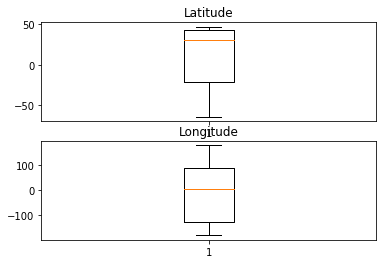

In [67]:
import pandas as pd
pd = df.toPandas()
pd_latitude = pd["Latitude"].astype('double')
pd_longitude = pd["Longitude"].astype('double')
print(type(pd_latitude[1]))
fig, ax1 = plt.subplots(2)
ax1[0].set_title('Latitude')
ax1[0].boxplot(pd_latitude)


ax1[1].set_title('Longitude')
ax1[1].boxplot(pd_longitude)

plt.show()

In [11]:
df.select('CD1').show()
df_final = df.na.fill(0)
df_final = df_final.drop("WD1", "WD2", "WD3")
df_final.show()

+---------+
|      CD1|
+---------+
| 58102.96|
|  6639.79|
| 15246.71|
|  5347.35|
|  4090.58|
| 44914.59|
| 17324.82|
| 10467.48|
|  7434.53|
|      0.0|
|   377.59|
|  3126.56|
|428395.48|
|      0.0|
|  4682.38|
|  3020.74|
| 31985.11|
|  1173.82|
|  9953.75|
|  4082.42|
+---------+
only showing top 20 rows

+---+--------+---------+---------+---------+---------+---+---+---+
| ID|Latitude|Longitude|      CD1|      CD2|      CD3|CD4|WD4| BS|
+---+--------+---------+---------+---------+---------+---+---+---+
|  1|   19.94|   -64.56| 58102.96| 21259.89|  2226.17|0.0|0.0|2.5|
|  2|   20.22|   -64.38|  6639.79|   4031.3|  1067.11|0.0|0.0|2.0|
|  3|   20.45|    -64.2| 15246.71| 12147.79|   991.66|0.0|0.0|2.0|
|  4|   21.13|   -63.83|  5347.35|  6851.29|  1420.39|0.0|0.0|2.0|
|  5|   21.47|   -63.59|  4090.58|  5317.76|   409.06|0.0|0.0|2.0|
|  6|   21.74|   -63.42| 44914.59| 46144.76| 33133.71|0.0|0.0|2.0|
|  7|   22.15|   -63.15| 17324.82|  4519.52|   502.17|0.0|0.0|2.0|
|  8|   22.84|  

In [15]:
import pandas as pd
pd1 = df_final.toPandas()
pd1["CD1"] = pd1["CD1"]

data_CD1 = pd1['CD1']
print(type(data_CD1[2]))
new_CD1 = []
for i in data_CD1:
    if i < 50000:
        new_CD1.append(0)
    elif i >= 50000 or i < 100000:
        new_CD1.append(1)
    else:
        new_CD1.append(2)

#
pollution_index = pd.DataFrame(new_CD1)
# concatenate a column to a dataset
final_dataset = pd.concat([pd1, pollution_index], axis=1)

# Rename one column name as the deafault name is 0
final_dataset.rename(columns={0: 'Pollution Index'}, inplace=True)

df_sp = spark.createDataFrame(final_dataset)

df_sp.show()

<class 'numpy.float64'>
+---+--------+---------+---------+---------+---------+---+---+---+---------------+
| ID|Latitude|Longitude|      CD1|      CD2|      CD3|CD4|WD4| BS|Pollution Index|
+---+--------+---------+---------+---------+---------+---+---+---+---------------+
|  1|   19.94|   -64.56| 58102.96| 21259.89|  2226.17|0.0|0.0|2.5|              1|
|  2|   20.22|   -64.38|  6639.79|   4031.3|  1067.11|0.0|0.0|2.0|              0|
|  3|   20.45|    -64.2| 15246.71| 12147.79|   991.66|0.0|0.0|2.0|              0|
|  4|   21.13|   -63.83|  5347.35|  6851.29|  1420.39|0.0|0.0|2.0|              0|
|  5|   21.47|   -63.59|  4090.58|  5317.76|   409.06|0.0|0.0|2.0|              0|
|  6|   21.74|   -63.42| 44914.59| 46144.76| 33133.71|0.0|0.0|2.0|              0|
|  7|   22.15|   -63.15| 17324.82|  4519.52|   502.17|0.0|0.0|2.0|              0|
|  8|   22.84|   -62.76| 10467.48| 10329.75|   413.19|0.0|0.0|2.0|              0|
|  9|   24.36|   -62.81|  7434.53|  9436.14|   190.63|0.0|0.0|4

In [16]:
# Joining the dataframe
df_new = spark.read.csv("Plastic2.csv", header=True)
inner_join = df_sp.join(df_new, df_sp['ID'] == df_new['ID'])
inner_join.show()

+---+--------+---------+---------+---------+---------+---+---+---+---------------+--------+---+
| ID|Latitude|Longitude|      CD1|      CD2|      CD3|CD4|WD4| BS|Pollution Index|    Date| ID|
+---+--------+---------+---------+---------+---------+---+---+---+---------------+--------+---+
|  1|   19.94|   -64.56| 58102.96| 21259.89|  2226.17|0.0|0.0|2.5|              1| 9/01/10|  1|
|  2|   20.22|   -64.38|  6639.79|   4031.3|  1067.11|0.0|0.0|2.0|              0| 9/01/10|  2|
|  3|   20.45|    -64.2| 15246.71| 12147.79|   991.66|0.0|0.0|2.0|              0| 9/01/10|  3|
|  4|   21.13|   -63.83|  5347.35|  6851.29|  1420.39|0.0|0.0|2.0|              0|10/01/10|  4|
|  5|   21.47|   -63.59|  4090.58|  5317.76|   409.06|0.0|0.0|2.0|              0|10/01/10|  5|
|  6|   21.74|   -63.42| 44914.59| 46144.76| 33133.71|0.0|0.0|2.0|              0|10/01/10|  6|
|  7|   22.15|   -63.15| 17324.82|  4519.52|   502.17|0.0|0.0|2.0|              0|11/01/10|  7|
|  8|   22.84|   -62.76| 10467.48| 10329

In [17]:
from pyspark.sql import functions as F
df_log = inner_join.withColumn("CD1", F.log(inner_join["CD1"]))

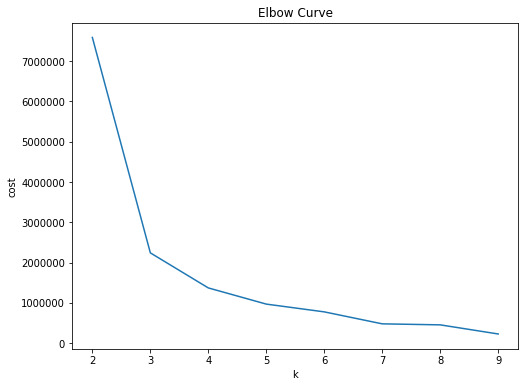

+---+--------+---------+------------------+---------+---------+---+---+---+---------------+--------+---+--------------+----------+
| ID|Latitude|Longitude|               CD1|      CD2|      CD3|CD4|WD4| BS|Pollution Index|    Date| ID|      features|prediction|
+---+--------+---------+------------------+---------+---------+---+---+---+---------------+--------+---+--------------+----------+
|  1|   19.94|   -64.56|10.969971888185984| 21259.89|  2226.17|0.0|0.0|2.5|              1| 9/01/10|  1|[-64.56,19.94]|         5|
|  2|   20.22|   -64.38| 8.800835615464328|   4031.3|  1067.11|0.0|0.0|2.0|              0| 9/01/10|  2|[-64.38,20.22]|         5|
|  3|   20.45|    -64.2| 9.632119021055914| 12147.79|   991.66|0.0|0.0|2.0|              0| 9/01/10|  3| [-64.2,20.45]|         5|
|  4|   21.13|   -63.83| 8.584356390072255|  6851.29|  1420.39|0.0|0.0|2.0|              0|10/01/10|  4|[-63.83,21.13]|         5|
|  5|   21.47|   -63.59| 8.316442048273814|  5317.76|   409.06|0.0|0.0|2.0|        

In [18]:
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.clustering import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

vecAssembler = VectorAssembler(inputCols=["Longitude", "Latitude"], outputCol="features")
new_df = vecAssembler.transform(df_log)

cost = np.zeros(10)
for k in range(2, 10):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('features')
    model = kmeans.fit(new_df)
    cost[k] = model.computeCost(new_df)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(range(2, 10), cost[2:10])
ax.set_xlabel('k')
ax.set_ylabel('cost')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Elbow Curve")
plt.show()

kmeans = KMeans(k=6, seed=1)  # 6 clusters here
model = kmeans.fit(new_df.select('features'))
transformed = model.transform(new_df)
transformed.show()